## **Data Preparation**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Loading datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merging datasets for clustering analysis
data = transactions.merge(customers, on="CustomerID")

# Feature engineering: Aggregate transaction data for each customer
customer_features = data.groupby("CustomerID").agg(
    TotalSpent=("TotalValue", "sum"),
    AvgTransactionValue=("TotalValue", "mean"),
    TotalTransactions=("TransactionID", "count"),
).reset_index()

# Feature engineering: Add region encoding
region_encoding = pd.get_dummies(data[["CustomerID", "Region"]].drop_duplicates(), columns=["Region"])
customer_features = customer_features.merge(region_encoding, on="CustomerID")

# Preparing the features for clustering
X = customer_features.drop("CustomerID", axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

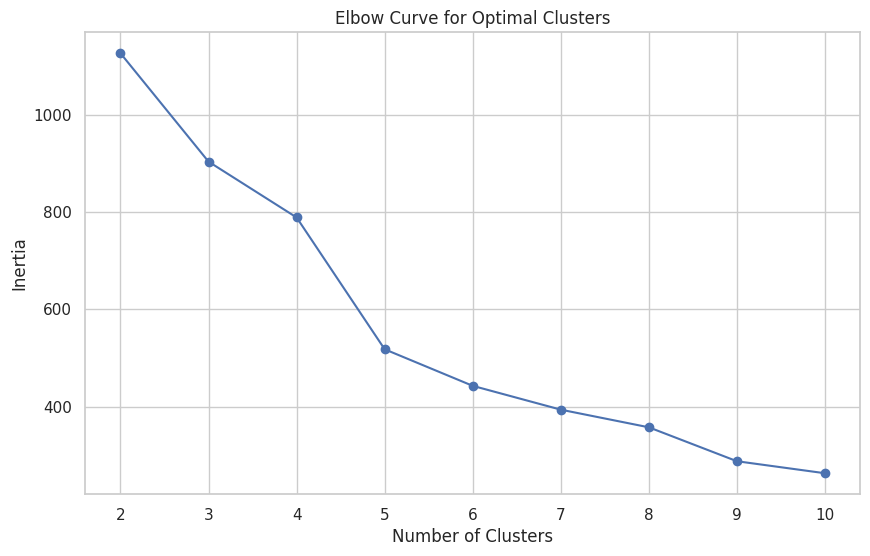

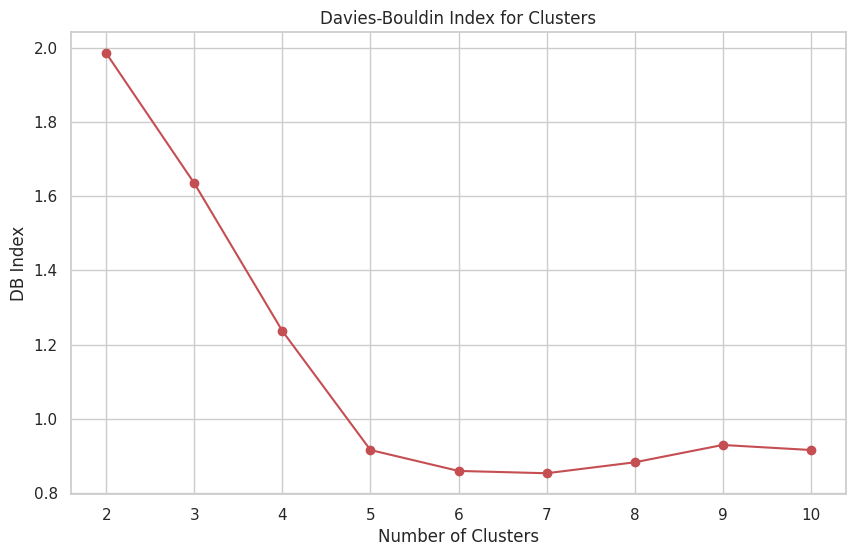

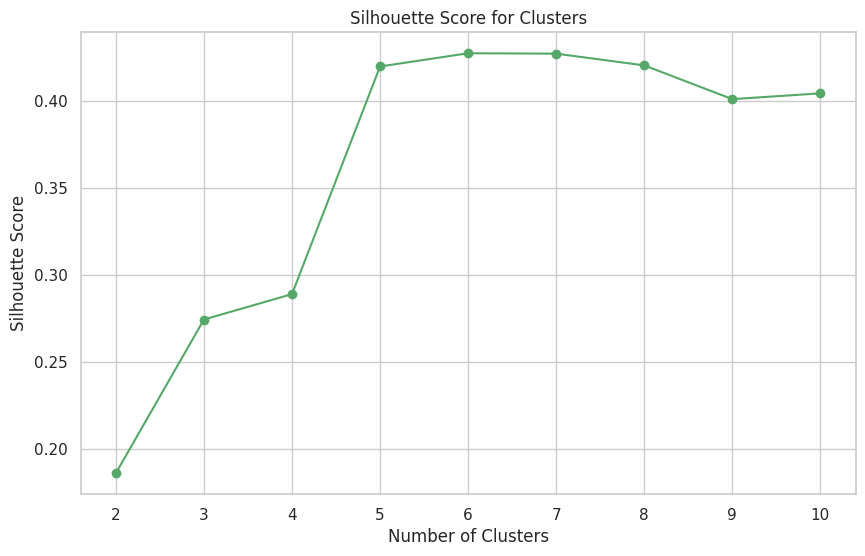

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Evaluating clusters using Elbow Method, Davies-Bouldin Index, and Silhouette Score
inertia = []
db_scores = []
silhouette_scores = []

for k in range(2, 11):  # Evaluate cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(X_scaled, labels))
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plotting Elbow Curve
plt.figure()
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Curve for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Plot Davies-Bouldin Index
plt.figure()
plt.plot(range(2, 11), db_scores, marker='o', color='r')
plt.title("Davies-Bouldin Index for Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.show()

# Plot Silhouette Scores
plt.figure()
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g')
plt.title("Silhouette Score for Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [5]:
# Choosing optimal number of clusters based on evaluation metrics
optimal_clusters = 4

# Perform clustering with KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(X_scaled)

# Evaluating the clustering
db_index = davies_bouldin_score(X_scaled, customer_features["Cluster"])
silhouette_avg = silhouette_score(X_scaled, customer_features["Cluster"])

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.23651322461426
Silhouette Score: 0.2887737637391407


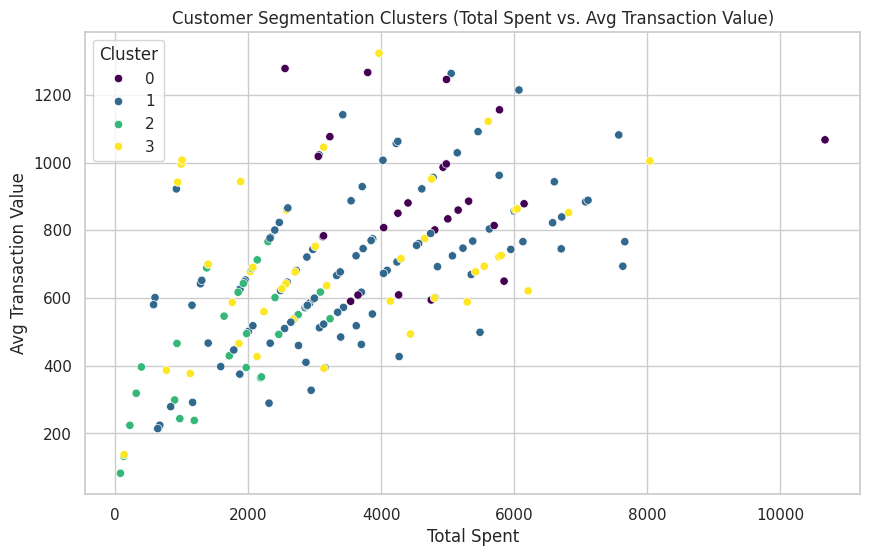

In [6]:
# Visualizing the clusters using a scatter plot
sns.scatterplot(
    x=customer_features["TotalSpent"],
    y=customer_features["AvgTransactionValue"],
    hue=customer_features["Cluster"],
    palette="viridis"
)
plt.title("Customer Segmentation Clusters (Total Spent vs. Avg Transaction Value)")
plt.xlabel("Total Spent")
plt.ylabel("Avg Transaction Value")
plt.show()
